In [1]:
# 导入所需模块
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 显示灰度图
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [5]:
# 加载数据集图片数据
digits = cv2.imread('./digits.png',0)

(1000, 2000)


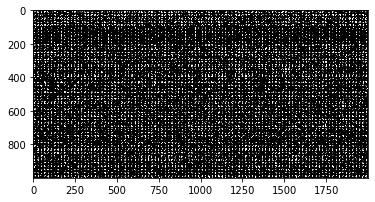

In [6]:
print(digits.shape)
plt_show(digits)

In [11]:
# 划分数据
cells = [np.hsplit(row,100) for row in np.vsplit(digits,50)] 
len(cells)

50

In [12]:
x = np.array(cells)
x.shape

(50, 100, 20, 20)

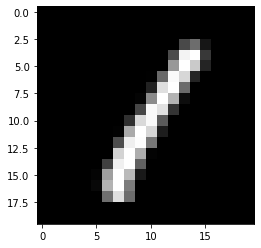

In [13]:
plt_show(x[5][0])

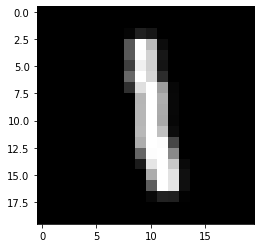

In [14]:
plt_show(x[5][1])

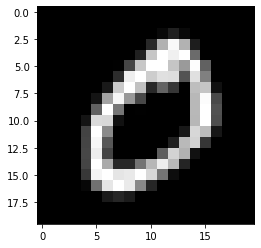

In [15]:
plt_show(x[0][0])

In [16]:
# 生成训练数据标签和测试数据标签
k = np.arange(10)
train_label = np.repeat(k,250)
test_label = train_label.copy()

In [17]:
# 图片数据转换为特征矩阵，划分训练数据集
train = x[:,:50].reshape(-1,400).astype(np.float32)

In [18]:
# 图片数据转换为特征矩阵，划分测试数据集
test = x[:,50:100].reshape(-1,400).astype(np.float32)
test.shape

(2500, 400)

In [19]:
# 数据准备完毕，准备开始训练
# 生成模型
knn = cv2.ml.KNearest_create()
# 训练数据
knn.train(train,cv2.ml.ROW_SAMPLE,train_label)

True

In [20]:
# 传入n值，和测试数据，返回结果
ret,result,neighbours,dist = knn.findNearest(test, 3)

In [21]:
# 统计正确的个数
res = 0
for i in range(2500):
    if result[i]==test_label[i]:
        res = res+1
res

2291

In [22]:
# 计算模型准确率
accuracy = res/result.size
print('识别测试数据的准确率为：',accuracy)

识别测试数据的准确率为： 0.9164


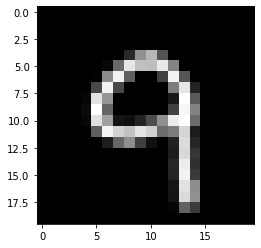

9

In [23]:
# 在测试集中随便找一张图片
test_image = test[2400].reshape(20,20)
plt_show(test_image)
test_label[2400]

In [24]:
# 将图片转换为特征矩阵
testImage = test[2400].reshape(-1,400).astype(np.float32)
testImage.shape
# 使用训练好的模型预测
ret,result,neighbours,dist = knn.findNearest(testImage, 3)
# 预测结果
print('识别出的数字为：',result[0][0])

识别出的数字为： 9.0


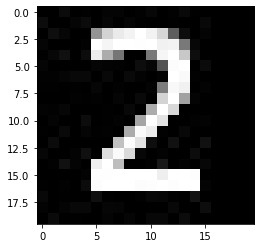

In [25]:
# 传入一张自己找的图片进行识别尺寸（20*20）
te = cv2.imread('123.png',0)
te.shape
tr = cv2.resize(te, (20,20))
plt_show(tr)

In [26]:
testImage = tr.reshape(-1,400).astype(np.float32)
testImage.shape
ret,result,neighbours,dist = knn.findNearest(testImage,10)
result
print('识别出的数字为：',result[0][0])

识别出的数字为： 2.0


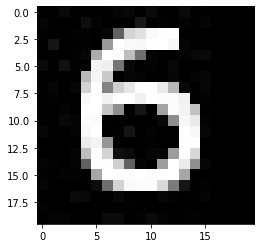

In [27]:
# 传入一张自己找的图片进行识别尺寸（20*20）
te = cv2.imread('666.png',0)
te.shape
tr = cv2.resize(te, (20,20))
plt_show(tr)

In [29]:
testImage = tr.reshape(-1,400).astype(np.float32)
testImage.shape
ret,result,neighbours,dist = knn.findNearest(testImage, 3)
result
print('识别出的数字为：',result[0][0])

识别出的数字为： 5.0


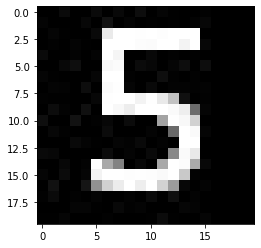

In [30]:
# 传入一张自己找的图片进行识别尺寸（20*20）
te = cv2.imread('555.png',0)
te.shape
tr = cv2.resize(te, (20,20))
plt_show(tr)

In [33]:
testImage = tr.reshape(-1,400).astype(np.float32)
testImage.shape
ret,result,neighbours,dist = knn.findNearest(testImage, 3)
result
print('识别出的数字为：',result[0][0])

识别出的数字为： 5.0


In [51]:
# Finish